In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import metrics

from xmeans import XMeans

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def visualize_and_evaluate(dataset_name, data, labels, num_centers, model, variance=1.0):
    fig = plt.figure(figsize=(6,6), dpi=90)
    plt.scatter(data[:, 0], data[:, 1], s=3, c=labels, cmap='viridis')
    plt.scatter(model.centroids[:, 0], model.centroids[:, 1], s=50, c='red')
    plt.title(f'{dataset_name} with shape: {data.shape}, K: {num_centers}, and $\sigma^2$: {variance}')
    plt.grid()
    plt.show()
    
    # reference: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
    print(f'Estimated K             : {model.K}')
    print(f'Silhouette score        : {metrics.silhouette_score(data, model.labels)}')
    print(f'Random Index score      : {metrics.adjusted_rand_score(labels, model.labels)}')
    print(f'Completeness score      : {metrics.completeness_score(labels, model.labels)}')
    print(f'Mutual Information score: {metrics.adjusted_mutual_info_score(labels, model.labels)}')

## 2-dimenisonal cases

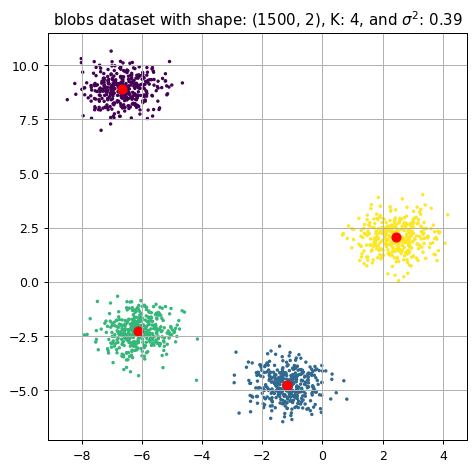

Estimated K             : 4
Silhouette score        : 0.8371465118899647
Random Index score      : 1.0
Completeness score      : 1.0
Mutual Information score: 1.0


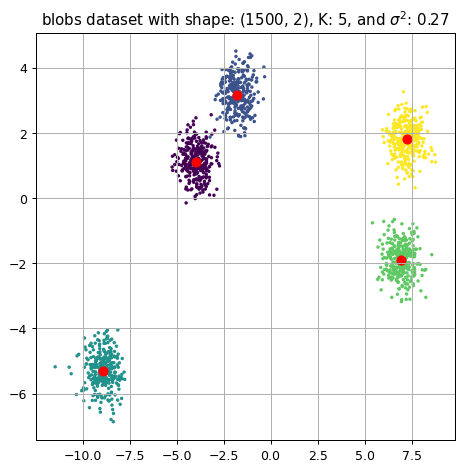

Estimated K             : 5
Silhouette score        : 0.759101513466892
Random Index score      : 0.9966688888888889
Completeness score      : 0.9944476566207651
Mutual Information score: 0.9944291211999778


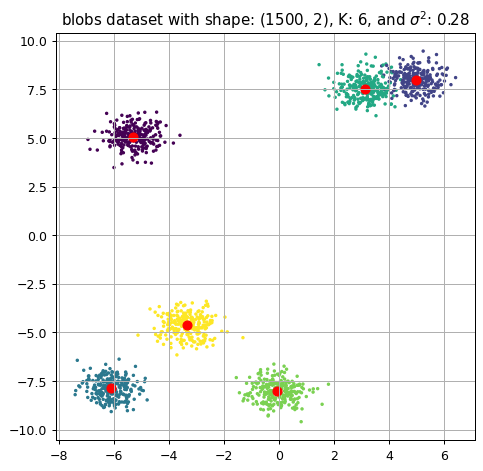

Estimated K             : 6
Silhouette score        : 0.7173399095328259
Random Index score      : 0.9766421384336694
Completeness score      : 0.9749457459864223
Mutual Information score: 0.9748272950143312


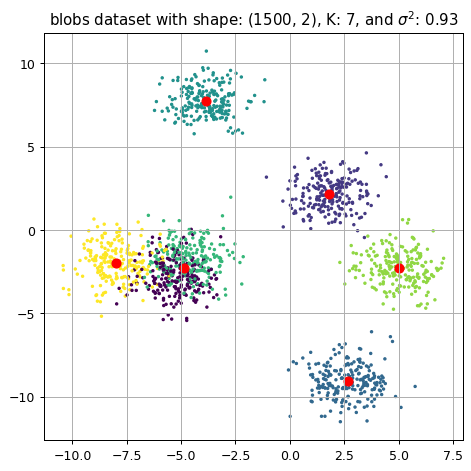

Estimated K             : 6
Silhouette score        : 0.6127421751536511
Random Index score      : 0.8049575573266313
Completeness score      : 0.9408459873168081
Mutual Information score: 0.8913868765126522


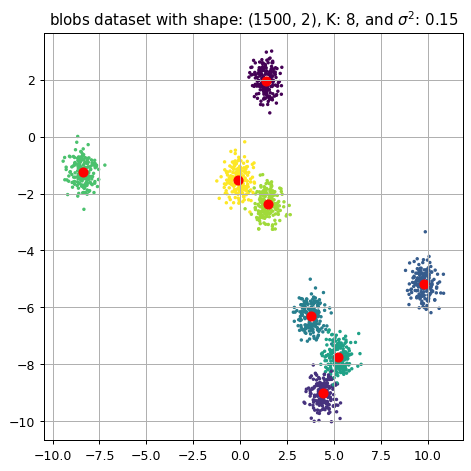

Estimated K             : 8
Silhouette score        : 0.6950103023491669
Random Index score      : 0.981918966291199
Completeness score      : 0.9799460963603746
Mutual Information score: 0.9797782577000265


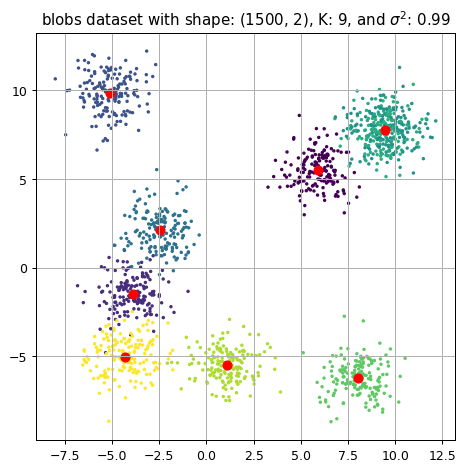

Estimated K             : 8
Silhouette score        : 0.6177956492348395
Random Index score      : 0.850911664607657
Completeness score      : 0.9581415604415846
Mutual Information score: 0.9230957039544087


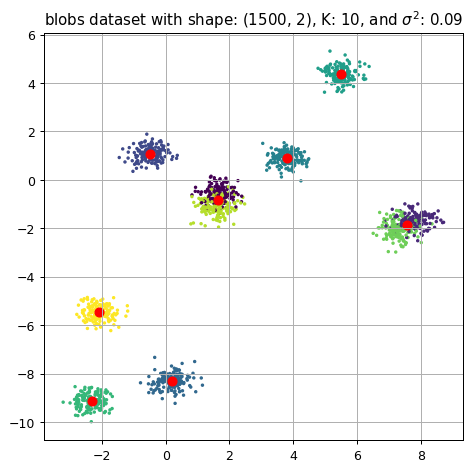

Estimated K             : 8
Silhouette score        : 0.8125164457909129
Random Index score      : 0.8103971667088288
Completeness score      : 1.0
Mutual Information score: 0.9353011584795606


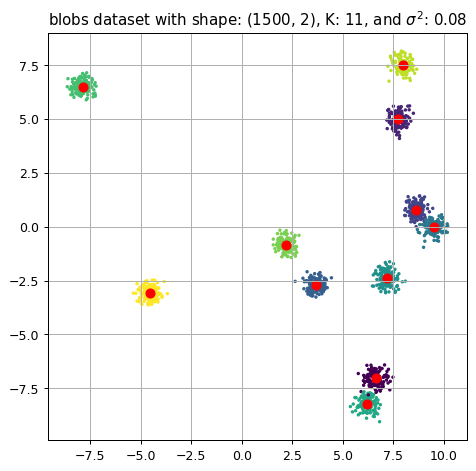

Estimated K             : 11
Silhouette score        : 0.7527991287428328
Random Index score      : 0.9955931787485165
Completeness score      : 0.9954528376084323
Mutual Information score: 0.995385555560272


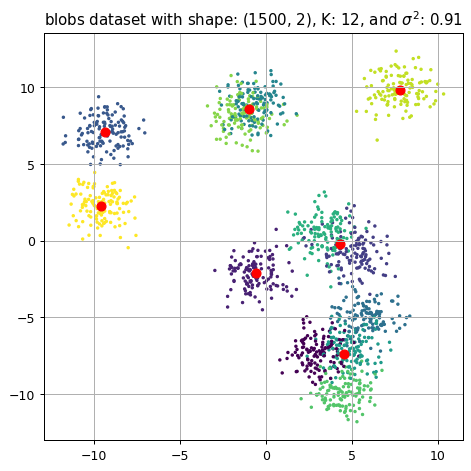

Estimated K             : 7
Silhouette score        : 0.6382048420238645
Random Index score      : 0.5407023026582596
Completeness score      : 0.9815424391763913
Mutual Information score: 0.8222613324186623


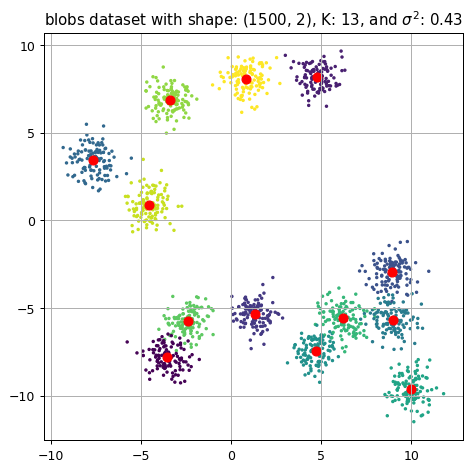

Estimated K             : 13
Silhouette score        : 0.6207920481630981
Random Index score      : 0.9663189891788073
Completeness score      : 0.9719839505493278
Mutual Information score: 0.9713971768078564


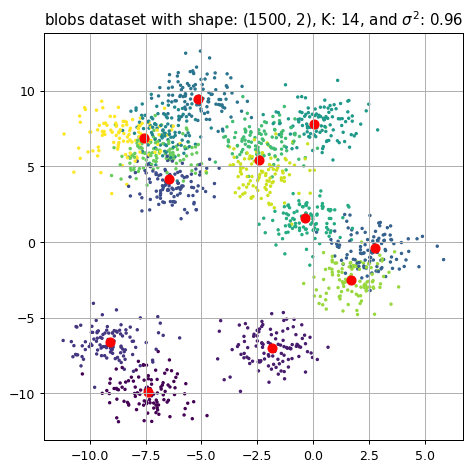

Estimated K             : 11
Silhouette score        : 0.4551270653253204
Random Index score      : 0.6484217176262506
Completeness score      : 0.8552335832358319
Mutual Information score: 0.8032456713937528


In [4]:
# blob datasets
for num_centers in range(4, 15):
    cluster_std = np.random.uniform(low=0.25, high=1.0, size=1)[0]
    data, labels = datasets.make_blobs(n_samples=1500, centers=num_centers, cluster_std=cluster_std)
    model = XMeans(K_max=20, identical_spherical_normal_distributions=False).fit(data)
    visualize_and_evaluate('blobs dataset', data, labels, num_centers, model, variance=round(cluster_std**2, 2))

## unnecessary split case

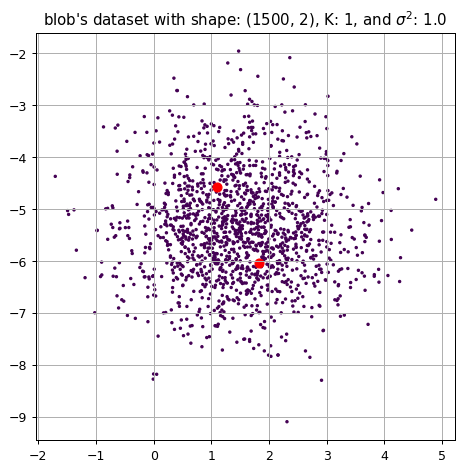

Estimated K             : 2
Silhouette score        : 0.3114394870499691
Random Index score      : 0.0
Completeness score      : 0.0
Mutual Information score: 0.0


In [5]:
num_centers = 1
data, labels = datasets.make_blobs(n_samples=1500, centers=num_centers)
model = XMeans(K_init=2, identical_spherical_normal_distributions=False).fit(data)
visualize_and_evaluate("blob's dataset", data, labels, num_centers, model)

## high dimensional case in 2D snapshot

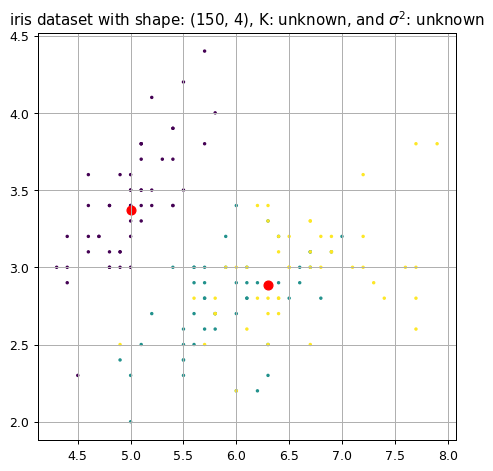

Estimated K             : 2
Silhouette score        : 0.681046169211746
Random Index score      : 0.5399218294207123
Completeness score      : 0.8835142349190769
Mutual Information score: 0.6538380713762779

note that data is in 4 dimension and the plot is only a 2D snapshot along the first 2 axes


In [6]:
# iris dataset
dataset = datasets.load_iris()
data = dataset.data
labels = dataset.target
model = XMeans(identical_spherical_normal_distributions=False).fit(data)
visualize_and_evaluate("iris dataset", data, labels, 'unknown', model, variance='unknown')
print(f'\nnote that data is in {data.shape[1]} dimension and the plot is only a 2D snapshot along the first 2 axes')